In [52]:
import pandas as pd

In [53]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
# 存活人数
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [59]:
# 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [60]:
train_corr = train.drop("PassengerId",axis = 1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

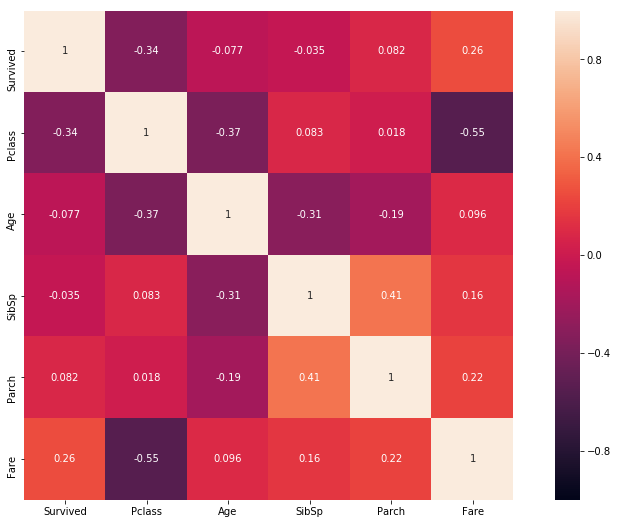

In [62]:
# 画出相关性热力图
a = plt.subplots(figsize=(15,9))
a = sns.heatmap(train_corr,vmin=-1,vmax=1,annot=True,square=True)

In [63]:
train.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [64]:
train.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

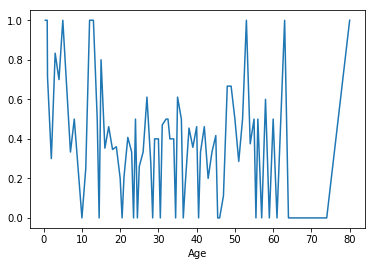

In [65]:
train.groupby(["Age"])["Survived"].mean().plot()

In [66]:
train.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
test["Survived"] = 0
train_test = train.append(test,ignore_index=True)

c:\users\caiwei\appdata\local\programs\python\python35\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [70]:
train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [71]:
train_test = pd.get_dummies(train_test,columns=["Pclass"])
train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,male,1,0,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,female,1,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,female,1,1,113803,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,male,0,0,373450,0,0,1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,male,0,0,330877,0,0,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,male,0,0,17463,1,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,male,3,0,349909,0,0,1
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,female,0,1,347742,0,0,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,female,1,1,237736,0,1,0


In [72]:
  train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Pclass_1       1309 non-null uint8
Pclass_2       1309 non-null uint8
Pclass_3       1309 non-null uint8
dtypes: float64(2), int64(4), object(5), uint8(3)
memory usage: 116.4+ KB


In [73]:
train_test = pd.get_dummies(train_test,columns=["Sex"])
train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,PC 17599,1,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,1,STON/O2. 3101282,0,0,1,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,113803,1,0,0,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,0,0,373450,0,0,1,0,1
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,0,0,330877,0,0,1,0,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,0,0,17463,1,0,0,0,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,349909,0,0,1,0,1
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,0,1,347742,0,0,1,1,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,1,1,237736,0,1,0,1,0


In [74]:
train_test["Sibsp_Parch"] = train_test["SibSp"] + train_test["Parch"]
train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Sibsp_Parch
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,1,0,1,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,PC 17599,1,0,0,1,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,0,1,STON/O2. 3101282,0,0,1,1,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,113803,1,0,0,1,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,0,0,373450,0,0,1,0,1,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,0,0,330877,0,0,1,0,1,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,0,0,17463,1,0,0,0,1,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,349909,0,0,1,0,1,4
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,0,1,347742,0,0,1,1,0,2
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,1,1,237736,0,1,0,1,0,1


In [75]:
train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','Sibsp_Parch']) 
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Parch_9,Sibsp_Parch_0,Sibsp_Parch_1,Sibsp_Parch_2,Sibsp_Parch_3,Sibsp_Parch_4,Sibsp_Parch_5,Sibsp_Parch_6,Sibsp_Parch_7,Sibsp_Parch_10
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,1,0,0,0,0,0,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,1,0,0,0,0,0,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,1,0,0,0,0,0,0,0,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,1,0,0,0,0,0,0,0,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,1,0,0,0,0,0,0,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,0,1,0,0,0,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,1,0,0,0,0,0,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,1,0,0,0,0,0,0,0


In [76]:
train_test


,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Parch_9,Sibsp_Parch_0,Sibsp_Parch_1,Sibsp_Parch_2,Sibsp_Parch_3,Sibsp_Parch_4,Sibsp_Parch_5,Sibsp_Parch_6,Sibsp_Parch_7,Sibsp_Parch_10
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,1,0,0,0,0,0,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,1,0,0,0,0,0,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,1,0,0,0,0,0,0,0,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,1,0,0,0,0,0,0,0,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,1,0,0,0,0,0,0,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,0,1,0,0,0,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,1,0,0,0,0,0,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,1,0,0,0,0,0,0,0


In [77]:
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()

In [78]:
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Sibsp_Parch_0,Sibsp_Parch_1,Sibsp_Parch_2,Sibsp_Parch_3,Sibsp_Parch_4,Sibsp_Parch_5,Sibsp_Parch_6,Sibsp_Parch_7,Sibsp_Parch_10,Name1
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,1,0,0,0,0,0,0,0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,1,0,0,0,0,0,0,0,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,1,0,0,0,0,0,0,0,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,1,0,0,0,0,0,0,0,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,1,0,0,0,0,0,0,0,0,Mr
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,1,0,0,0,0,0,0,0,0,Mr
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,1,0,0,0,0,0,0,0,0,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,1,0,0,0,0,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,1,0,0,0,0,0,0,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,1,0,0,0,0,0,0,0,Mrs


In [79]:
train_test['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

In [80]:
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Sibsp_Parch_0,Sibsp_Parch_1,Sibsp_Parch_2,Sibsp_Parch_3,Sibsp_Parch_4,Sibsp_Parch_5,Sibsp_Parch_6,Sibsp_Parch_7,Sibsp_Parch_10,Name1
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,1,0,0,0,0,0,0,0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,1,0,0,0,0,0,0,0,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,1,0,0,0,0,0,0,0,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,1,0,0,0,0,0,0,0,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,1,0,0,0,0,0,0,0,0,Mr
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,1,0,0,0,0,0,0,0,0,Mr
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,1,0,0,0,0,0,0,0,0,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,1,0,0,0,0,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,1,0,0,0,0,0,0,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,1,0,0,0,0,0,0,0,Mrs


In [81]:
train_test = pd.get_dummies(train_test,columns=['Name1'])

In [82]:
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Sibsp_Parch_10,Name1_Master,Name1_Miss,Name1_Mlle,Name1_Mme,Name1_Mr,Name1_Mrs,Name1_Ms,Name1_Officer,Name1_Royalty
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,0,0,0,0,1,0,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,0,1,0,0,0,0,0,0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,0,0,0,0,1,0,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,0,0,0,0,1,0,0,0,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,0,0,0,0,1,0,0,0,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,0,0,0,0,1,0,0,0,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,1,0,0,0,0,0,0,0,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,0,0,0,1,0,0,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,0,0,0,0,1,0,0,0


In [83]:
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Name1_Master,Name1_Miss,Name1_Mlle,Name1_Mme,Name1_Mr,Name1_Mrs,Name1_Ms,Name1_Officer,Name1_Royalty,Name2
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,0,0,1,0,0,0,0,Owen Harris
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,0,0,0,1,0,0,0,John Bradley (Florence Briggs Thayer)
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,1,0,0,0,0,0,0,0,Laina
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,0,0,0,1,0,0,0,Jacques Heath (Lily May Peel)
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,0,0,0,1,0,0,0,0,William Henry
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,0,0,0,1,0,0,0,0,James
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,0,0,0,1,0,0,0,0,Timothy J
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,1,0,0,0,0,0,0,0,0,Gosta Leonard
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,0,0,1,0,0,0,Oscar W (Elisabeth Vilhelmina Berg)
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,0,0,0,1,0,0,0,Nicholas (Adele Achem)


In [84]:
Name2_sum = train_test['Name2'].value_counts().reset_index()
Name2_sum

,index,Name2
0,John,15
1,William,11
2,Patrick,10
3,James,9
4,Mary,7
5,Joseph,7
6,Ivan,6
7,William Henry,6
8,Samuel,5
9,Harry,5


In [85]:
Name2_sum.columns = ['Name2','Name2_sum']
Name2_sum

,Name2,Name2_sum
0,John,15
1,William,11
2,Patrick,10
3,James,9
4,Mary,7
5,Joseph,7
6,Ivan,6
7,William Henry,6
8,Samuel,5
9,Harry,5


In [86]:
train_test = pd.merge(train_test,Name2_sum,how = "left",on = "Name2")

In [87]:
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Name1_Miss,Name1_Mlle,Name1_Mme,Name1_Mr,Name1_Mrs,Name1_Ms,Name1_Officer,Name1_Royalty,Name2,Name2_sum
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,0,1,0,0,0,0,Owen Harris,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,0,0,1,0,0,0,John Bradley (Florence Briggs Thayer),1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,1,0,0,0,0,0,0,0,Laina,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,0,0,1,0,0,0,Jacques Heath (Lily May Peel),1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,0,0,1,0,0,0,0,William Henry,6
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,0,0,1,0,0,0,0,James,9
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,0,0,1,0,0,0,0,Timothy J,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,0,0,0,0,Gosta Leonard,1
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,0,1,0,0,0,Oscar W (Elisabeth Vilhelmina Berg),1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,0,0,1,0,0,0,Nicholas (Adele Achem),1


In [88]:
train_test.loc[train_test['Name2_sum'] == 1 , 'Name2_new'] = 'one'
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Name1_Mlle,Name1_Mme,Name1_Mr,Name1_Mrs,Name1_Ms,Name1_Officer,Name1_Royalty,Name2,Name2_sum,Name2_new
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,1,0,0,0,0,Owen Harris,1,one
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,0,1,0,0,0,John Bradley (Florence Briggs Thayer),1,one
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,0,0,0,0,0,0,Laina,1,one
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,0,1,0,0,0,Jacques Heath (Lily May Peel),1,one
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,0,1,0,0,0,0,William Henry,6,NaN
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,0,1,0,0,0,0,James,9,NaN
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,0,1,0,0,0,0,Timothy J,1,one
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,0,0,0,Gosta Leonard,1,one
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,1,0,0,0,Oscar W (Elisabeth Vilhelmina Berg),1,one
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,0,1,0,0,0,Nicholas (Adele Achem),1,one


In [89]:
train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']

In [90]:
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Name1_Mlle,Name1_Mme,Name1_Mr,Name1_Mrs,Name1_Ms,Name1_Officer,Name1_Royalty,Name2,Name2_sum,Name2_new
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,1,0,0,0,0,Owen Harris,1,one
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,0,1,0,0,0,John Bradley (Florence Briggs Thayer),1,one
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,0,0,0,0,0,0,Laina,1,one
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,0,1,0,0,0,Jacques Heath (Lily May Peel),1,one
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,0,1,0,0,0,0,William Henry,6,William Henry
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,0,1,0,0,0,0,James,9,James
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,0,1,0,0,0,0,Timothy J,1,one
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,0,0,0,Gosta Leonard,1,one
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,1,0,0,0,Oscar W (Elisabeth Vilhelmina Berg),1,one
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,0,1,0,0,0,Nicholas (Adele Achem),1,one


In [91]:
del train_test['Name2']
train_test = pd.get_dummies(train_test,columns=['Name2_new'])
train_test

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,...,0,0,0,0,0,0,0,0,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,...,0,0,0,0,0,1,0,0,0,0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",6,0,330877,0,0,...,0,0,0,0,0,0,0,0,0,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,...,0,0,0,0,0,0,0,0,0,1
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,...,0,0,0,0,0,0,0,0,0,1
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,...,0,0,0,0,0,0,0,0,0,1


In [92]:
del train_test['Name']

In [93]:
train_test.loc[train_test["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
1043,60.5,NaN,S,NaN,1044,0,3701,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
train.groupby(by=["Pclass","Embarked"]).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [95]:
train_test["Fare"].fillna(14.435422,inplace=True)

In [96]:
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [97]:
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)
train_test

,Age,Cabin,Embarked,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Ticket_Letter_SOTON/O2,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P
0,22.0,NaN,S,7.2500,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,C,71.2833,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,S,7.9250,3,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,35.0,C123,S,53.1000,4,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,35.0,NaN,S,8.0500,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,Q,8.4583,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,54.0,E46,S,51.8625,7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.0,NaN,S,21.0750,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,27.0,NaN,S,11.1333,9,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,14.0,NaN,C,30.0708,10,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

In [99]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 185 entries, Age to age_nan_1.0
dtypes: float64(2), int64(3), object(2), uint8(178)
memory usage: 349.4+ KB


In [100]:
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

In [101]:
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [105]:
# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

ValueError: could not convert string to float: 'S'

In [107]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()

In [108]:
lin.fit(missing_age_X_train,missing_age_Y_train)

ValueError: could not convert string to float: 'S'

In [109]:
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

NotFittedError: This BayesianRidge instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [110]:
train_test

,Age,Cabin,Embarked,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,22.0,NaN,S,7.2500,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,38.0,C85,C,71.2833,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,26.0,NaN,S,7.9250,3,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
3,35.0,C123,S,53.1000,4,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,35.0,NaN,S,8.0500,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,NaN,NaN,Q,8.4583,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,54.0,E46,S,51.8625,7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,2.0,NaN,S,21.0750,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,27.0,NaN,S,11.1333,9,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
9,14.0,NaN,C,30.0708,10,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [111]:
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])

train_test = pd.get_dummies(train_test,columns=['Age'])

In [112]:
train_test['Cabin_nan'] = train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])
train_test.loc[train_test["Cabin"].isnull() ,"Cabin_nan"] = 1
train_test.loc[train_test["Cabin"].notnull() ,"Cabin_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])
train_test.drop('Cabin',axis=1,inplace=True)

In [113]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)

In [114]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

ValueError: could not convert string to float: 'Q'

In [115]:
train_data_X_sd

NameError: name 'train_data_X_sd' is not defined

In [ ]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,max_iter=100)

import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=6,min_samples_leaf=2,n_estimators=100,num_round = 5)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=6,oob_score=True)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=2,max_depth=6,n_estimators=100)

vot = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('gbdt',gbdt),('xgb',xgb_model)], voting='hard')
vot.fit(train_data_X_sd,train_data_Y)

test["Survived"] = vot.predict(test_data_X_sd)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('vot5.csv')